In [1]:
#required Libraries 
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Preprocess all train images
train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory( 'train',
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

Found 31157 images belonging to 2 classes.


In [3]:
# Preprocess all test images
validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator =  validation_datagen.flow_from_directory( 'test',
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation') 

Found 2123 images belonging to 2 classes.


In [4]:
# create model structure
eye_model = Sequential()

eye_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
eye_model.add(MaxPooling2D(pool_size=(1,1)))

eye_model.add(Conv2D(32,(3,3),activation='relu'))
eye_model.add(MaxPooling2D(pool_size=(1,1)))

eye_model.add(Conv2D(64, (3, 3), activation='relu'))
eye_model.add(MaxPooling2D(pool_size=(1,1)))
eye_model.add(Dropout(0.25))

eye_model.add(Flatten())
eye_model.add(Dense(128, activation='relu'))
eye_model.add(Dense(2, activation='softmax'))

In [5]:
eye_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])

In [6]:
eye_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [7]:
history = eye_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10


974/974 [==============================] - 333s 340ms/step - loss: 0.3639 - accuracy: 0.9250 - val_loss: 0.6745 - val_accuracy: 0.8144
Epoch 2/10
974/974 [==============================] - 107s 110ms/step - loss: 0.0670 - accuracy: 0.9797 - val_loss: 1.0716 - val_accuracy: 0.7466
Epoch 3/10
974/974 [==============================] - 108s 111ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 1.3688 - val_accuracy: 0.7070
Epoch 4/10
974/974 [==============================] - 112s 115ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 1.1329 - val_accuracy: 0.6915
Epoch 5/10
974/974 [==============================] - 112s 115ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.6764 - val_accuracy: 0.8022
Epoch 6/10
974/974 [==============================] - 113s 116ms/step - loss: 0.0268 - accuracy: 0.9914 - val_loss: 2.8992 - val_accuracy: 0.5911
Epoch 7/10
974/974 [==============================] - 112s 115ms/step - loss: 0.0262 - accuracy: 0.9914 - val_loss: 1.3785

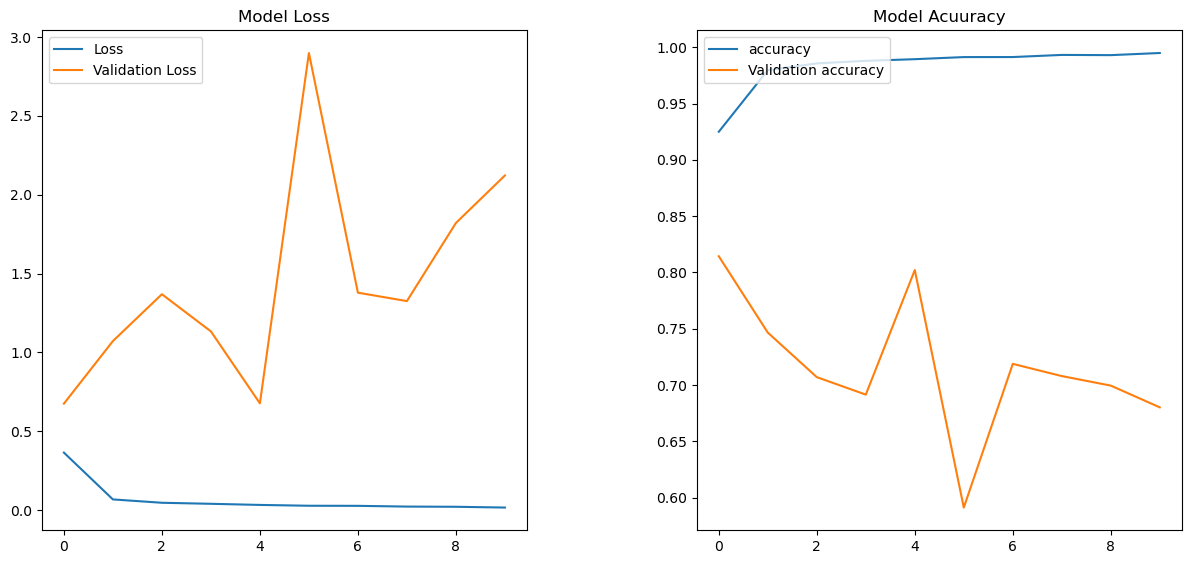

In [8]:
#plotting Loss and Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Loss','Validation Loss'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

#plotting accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuuracy')
plt.legend(['accuracy','Validation accuracy'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

# testing the image
# importing one of the image for predicting the output is correct or not

In [9]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("s0001_00002_0_0_0_0_0_01.png")
print(image.shape)
r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(r_eye.shape)
r_eye = cv2.resize(r_eye, (img_height,img_width))
print(r_eye.shape)
#r_eye= r_eye/255
r_eye=  r_eye.reshape((-1, 32, 32, 3))
print(r_eye.shape)
#r_eye = np.expand_dims(r_eye,axis=0)
pred=eye_model.predict(r_eye)

(84, 84, 3)
(84, 84, 3)
(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 247ms/step


# 0 is close 1 is open

In [10]:
np.argmax(pred)

0

In [11]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("s0001_00002_0_0_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [12]:
#predicting the images 
pred=eye_model.predict(image)

1/1 [==============================] - 0s 27ms/step


In [13]:
# 0 is close 1 is open
output=np.argmax(pred)
print("The predicted image is", output)

The predicted image is 0


In [14]:
# save trained model weight in .h5 file
eye_model.save("eye_cnn.h5")

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from keras.models import load_model
test_model = load_model('eye_cnn.h5')
pred = np.argmax(test_model.predict(image), axis=-1)
print(pred)

1/1 [==============================] - 0s 128ms/step
[0]
